# Introduction to Matplotlib. Part 2

Welcome back. This is the second part of the Data Visualization with Matplotlib Workshop. Last time we learned the basics of how matplotlib works. Today, we will be focusing on applying those basics concepts to create different kinds of plots. We will be focusing on

 - Scatter plots 
 - Lines with Errors
 - Barplots
 - Histograms
 - Heatmaps
 - Pictures (like photographs)

Lot of ground to cover, but you will see that the basic syntax is always the same.

We will mostly be using the Baby Name Dataset introduced yesterday. As a reminder, it shows the number of newborns with a given name in each year starting from 1965. Let's load the data and start.

In [1]:
import pandas as pd
import numpy as np

# Read the name data from a csv
name_data_url = r'https://raw.githubusercontent.com/non87/Matplotlib-Workshop/master/data/national_reduced.csv'
names = pd.read_csv(name_data_url)
# Look at the column names and data type
print(f'{names.info()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1192014 entries, 0 to 1192013
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1192014 non-null  int64 
 1   Id          1192014 non-null  int64 
 2   Name        1192014 non-null  object
 3   Year        1192014 non-null  int64 
 4   Gender      1192014 non-null  object
 5   Count       1192014 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 54.6+ MB
None


### Scatter Plots (and Their Parameters)

Using the definition of _scatter plot_ that Google suggests, "A scatter plot uses dots to represent values for two different numeric variables". They are mostly used to study how two variables co-vary together. For example, you can plot time and number of newborns with a given name. 

We will analyze the use of "Morgan" and "Taylor" over time. We start by constructing two pandas `DataFrame` containing the number of babies (boys and girls) named "Morgan" or "Taylor" each year.

In [2]:
# Morgan and taylor data
morgan = names.loc[names["Name"] == "Morgan", :]
taylor = names.loc[names["Name"] == "Taylor", :]
# Relevant years
years_morgan = morgan['Year'].unique()
years_taylor = taylor['Year'].unique()
# For each year, we get the proportion of newborns named morgan/taylor who is F
# We first construct a DataFrame containing the number of girls and total newborns for each year for Morgan
morgan = pd.DataFrame({"Girls": morgan.loc[morgan['Gender'] == "F", :].groupby(['Year']).sum()['Count'], 'Total': morgan.groupby(['Year']).sum()['Count']})
# Same for Taylor
taylor = pd.DataFrame({"Girls": taylor.loc[taylor['Gender'] == "F", :].groupby(['Year']).sum()['Count'], 'Total': taylor.groupby(['Year']).sum()['Count']})
# Get the proportions
morgan['Proportion'] = morgan['Girls'] / morgan['Total']
taylor['Proportion'] = taylor['Girls'] / taylor['Total']
# The years are there as the index in the two DataFrame. It is convenient to have the years as columns
morgan['Year'] = morgan.index
taylor['Year'] = taylor.index
print(f"This is how the Morgan data looks like:\n\n{morgan.head()}")

This is how the Morgan data looks like:

      Girls  Total  Proportion  Year
Year                                
1965     44    252    0.174603  1965
1966     34    258    0.131783  1966
1967     43    314    0.136943  1967
1968     36    299    0.120401  1968
1969     63    396    0.159091  1969


We start with plotting both the Morgan and the Taylor data in the same plot. This will work as a quick recap of what we did yesterday. Besides the use of the method `Axes.scatter()` , the next code block does not introduce anything new.

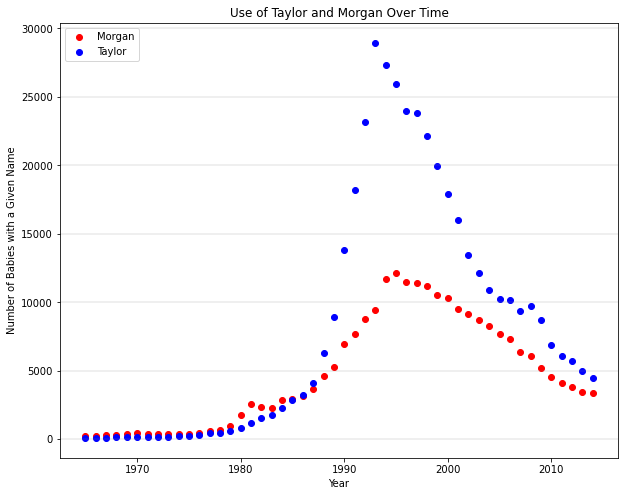

In [3]:
# Let's not forget to set the backend and load matplotlib 
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

# The fundamental line
fig, ax = plt.subplots(figsize=(10,8))
# Usual settings
ax.set_title('Use of Taylor and Morgan Over Time')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Babies with a Given Name')
# Now the scatter plot. The syntax is very similar to the syntax of .plot()
ax.scatter(morgan['Year'], morgan['Total'], color = 'red', label = 'Morgan')
ax.scatter(taylor['Year'], taylor['Total'], color = 'blue', label = 'Taylor')
# Legend and grid
ax.legend(loc='upper left')
ax.grid(color=(0.5,0.5,0.5,0.2), axis='y', lw=0.25)

The sytnax and final result of `Axes.scatter()` are very similar to the syntax and final result of `Axes.plot()`, which we saw last time. Then, why should you bother about `Axes.scatter()`? Well, scatter plots actually have ways to plot a third variable, while still remaining 2-d plots. So far, we have colored our points to distinguish the Morgan data from the Taylor data. Yet, we can use colors to specify the proportion of girls among the babies and market type to distinguish beteen Morgan and Taylor. Alternatively, we can use the dimension of the markers to communicate how many newborns have a certain name. We will do both orderly. 

As a side note, it is possible to use both colors and marker-size to enanche your scatter plot. This way, you could show as many as four dimensions in a single, 2-dimensional plot. This sounds great on paper, but this strategy risks overloading the plot with too much information. 

Let's start with the proportion of girls through colors. We will use the all-important `c` argument of `Axes.scatter()` to provide the proportion-of-girls data for each marker we plot. We will also indicate a predifined colormap with the argument `cmap`. You can find a list of all available colormaps in <a href="https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html">the official documentation</a>. We will also learn how to construct our own colormap in the extra section below. As mentioned, we will also use different kinds of marker to distinguish the Morgan data from the Taylor data. See <a href="https://matplotlib.org/3.1.1/api/markers_api.html">this documentation page</a> for a complete list of the available markers.

<div class="alert alert-block alert-success">
    <b>Reverse the Colormap</b>: In addition to the colormap shown in <a href="https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html">the official documentation</a>, you can add "_r" to the name of a colormap to obtain its reverse. For example, the colormap "spring" spans from dark blue to yellow. In the code below, I use the colormap "spring_r", spanning from yellow to blue.
    </div>

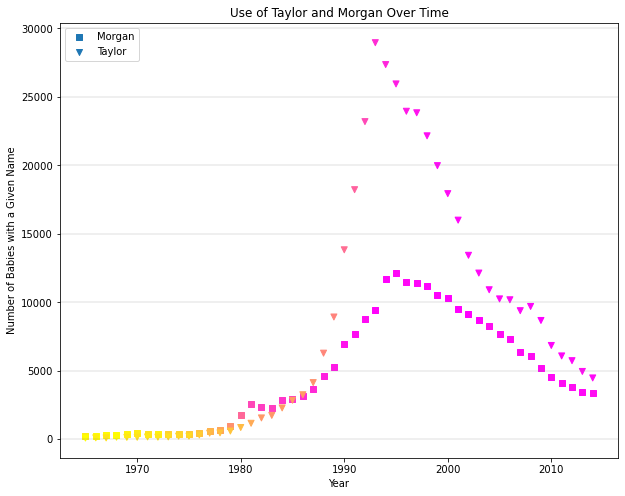

In [4]:
# Same plot as before, but we also need to distinguish the two series of data using different kinds of points.
# The fundamental line
fig, ax = plt.subplots(figsize=(10,8))
# Exactly as before
ax.set_title('Use of Taylor and Morgan Over Time')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Babies with a Given Name')
# Now the scatter plot. notice the new arguments:
# marker: what kind of marker the data series uses
# c: color in proportion to a variable
# cmap: what color map to use for c
# We delete the color argument (it is incompatible with the c argument)
ax.scatter(morgan['Year'], morgan['Total'], c = morgan['Proportion'], label = 'Morgan', marker = 's', cmap='spring_r')
ax.scatter(taylor['Year'], taylor['Total'], c = taylor['Proportion'], label = 'Taylor', marker = 'v', cmap='spring_r')
# Legend and grid
ax.legend(loc='upper left')
ax.grid(color=(0.5,0.5,0.5,0.2), axis='y', lw=0.25)

Ok, we will come back to the previous plot in the extra section below -- it is a little more complex, so it is "extra". For the moment, let's focus on the markers' sizes and how to modify them. Here we will use the _s_ argument of `Axes.scatterplot()`. However, it makes sense to change the way the information is presented. On the y-axis we will have the proportion of newborns who are girls. The size of the markers will represent how many newbors are given the name "Morgan" ("Taylor") each year.

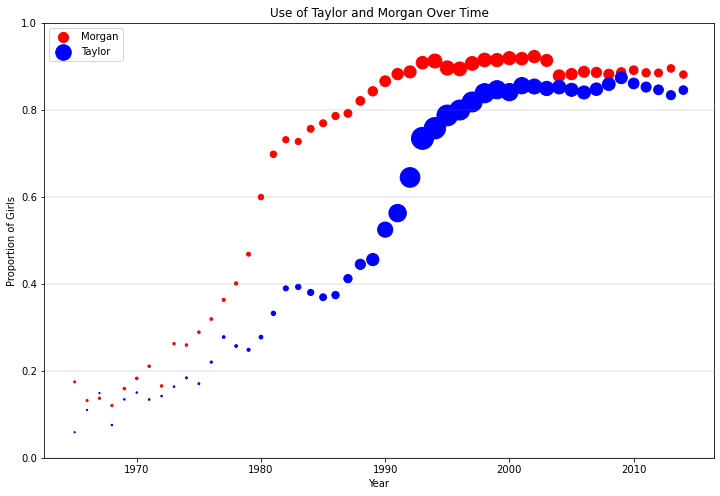

In [5]:
# The usual
fig, ax = plt.subplots(figsize=(12,8))
ax.set_title('Use of Taylor and Morgan Over Time')
ax.set_xlabel('Year')
# Now the change starts
ax.set_ylabel('Proportion of Girls')
ax.set_ylim([0,1])
# Now the scatter plot. notice the new arguments:
# s: size of the marker
ax.scatter(morgan['Year'], morgan['Proportion'], s = morgan['Total']/60, label = 'Morgan', color = 'red')
ax.scatter(taylor['Year'], taylor['Proportion'], s = taylor['Total']/60, label = 'Taylor', color = 'blue')
# ax.scatter(taylor['Year'], taylor['Total'], c = taylor['Proportion'], label = 'Taylor', marker = 'v', cmap='spring_r')
# # Legend and grid
ax.legend(loc='upper left')
ax.grid(color=(0.5,0.5,0.5,0.2), axis='y', lw=0.25)

#### Exercise

Putting time on the x-axis usually helps to make the plot readable. Let's check if this holds true in our case. Create a new scatter plot from the Morgan data. Put the Total on the x-axis and the proportion on the y-axis. Use color to signify the year. Experiment with a new colormap: choose a new cmap <a href="https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html">here</a>. 

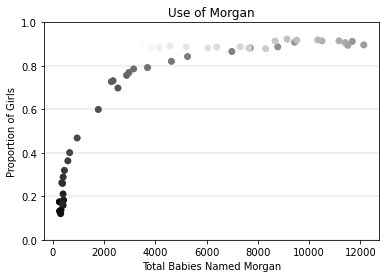

In [6]:
# Create a figure and and an Axes with the fundamental line
fig, ax = plt.subplots()
# Put "Use of Morgan" as a title
ax.set_title('Use of Morgan')
# Use "Total Babies Named Morgan" as the x label
ax.set_xlabel('Total Babies Named Morgan')
# Use "Proportion of Girls" as the y label
ax.set_ylabel('Proportion of Girls')
# Set the y limits from 0 to 1
ax.set_ylim([0,1])
# Now the scatter plot. Use
# x-axis: morgan['total']
# y-axis: morgan['Proportion']
# color: morgan['Year']
ax.scatter(morgan['Total'], morgan['Proportion'], c = morgan['Year'], label = 'Morgan', cmap = 'gist_gray')
ax.grid(color=(0.5,0.5,0.5,0.2), axis='y', lw=0.25)

##### Extra: Colorbars, Colormaps and How to Personalize It

One of the plots above used color to show the proportion of girls in each year. However, it is clearly missing something: we need a color scale to tell us what the colors in the plot actually means. Let's introduce a new method of a `Figure`, `Figure.colorbar()`. This method creates a color bar for the colorcode you use in an image (or a specific `Artist` within an `Axes`). Unfortunately, the code to use this method is surprisingly complex. In my humble opionion, it is also not well documented. Therefore, let's take the time to look at how to do this properly. 

Let's examine the two main arguments that the `Figure.colorbar()` method takes:

- The first argument of `Figure.colorbar()` is an object of the class `matplotlib.cm.ScalarMappable` or an `Artist`. Internally, matplotlib always construct `ScalarMappable` anyway. Let's see what this object is about:
  - A `ScalarMappable` maps numerical values to coordinates in the RGBA space. In practice, you input a number between 0 and 1 and it outputs a color. It has two basic components that you need to specify:
    - First, you need to specify a normalizer. This will be an object of the type `cm.colors.Normalize()`. This object has two main arguments, _vmin_ and _vmax_. These arguments specify the lowest (highest) numerical values that you need to map to RGBA coordinates -- these extreme values map onto the extremes of your colormap. The `cm.colors.Normalize()` object transforms scalar numbers between _vmin_ and _vmax_ into scalars between 0 and 1 -- as the name suggests, the object actually normalizes the input! 
    - Second, you need to specify a _cmap_. You can both pass your own personalized _cmap_ , or simply a keyword corresponding to the pre-installed color maps in matplotlib.
  - The second main parameter is a `cax`. When you create a `.colorbar()` you need to make room for it -- that is, you need a new `Axes` attached to your original figure. At the same time, you probably need to shrink the extant `Axes`. I show you the way I do this in my code by using the toolkit `axes_grid1`, which is a powerful tool specifically designed to manage `Axes` in a `Figure`.  There are other ways, but, in my own experience, this works wonders.
  
  <div class="alert alert-block alert-success">
    <b>Different Normalizer</b>: There are many ways to map a range of values to the real numbers between 0 and 1. The cm.colors.Normalize() object described above uses a liner projection. However, one may want to use different, non-linear methods -- such as a logarthmic mapping. <a href="  https://matplotlib.org/3.1.0/tutorials/colors/colormapnorms.html
        ">This tutorial</a> shows you the different possibilities already implemented in matplotlib.
    </div>


Text(0, 0.5, 'Proportion of Girls')

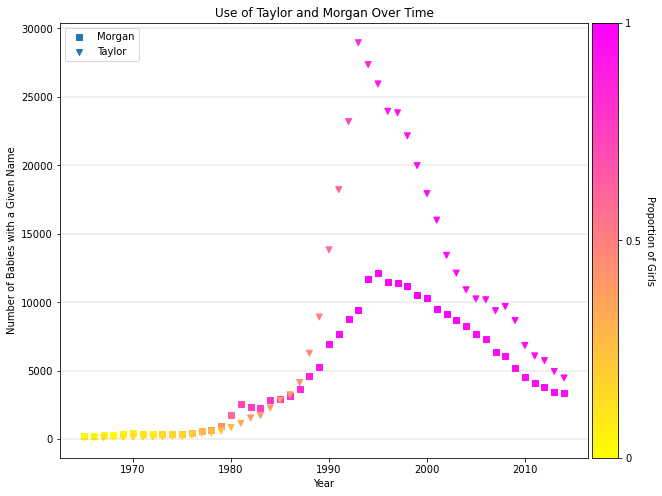

In [7]:
# The toolkit I mentioned
from mpl_toolkits.axes_grid1 import make_axes_locatable
# This is the complex part We need the submodule cm
from matplotlib import cm
norm=cm.colors.Normalize()

# Same plot as before
fig, ax = plt.subplots(figsize=(10,8))
ax.set_title('Use of Taylor and Morgan Over Time')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Babies with a Given Name')
col_object = ax.scatter(morgan['Year'], morgan['Total'], c = morgan['Proportion'], label = 'Morgan', marker = 's', cmap='spring_r')
col_object = ax.scatter(taylor['Year'], taylor['Total'], c = taylor['Proportion'], label = 'Taylor', marker = 'v', cmap='spring_r')
ax.legend(loc='upper left')
ax.grid(color=(0.5,0.5,0.5,0.2), axis='y', lw=0.25)
# Create the ScalarMappable object
# In our data, we need to create a colorcode for the proportion of girls
# This will go from 0 (vmin) to 1 (vmax)
norm=cm.colors.Normalize(vmin=0, vmax=1)
scalar_mappable = matplotlib.cm.ScalarMappable(norm, cmap='spring_r')
# Now, create the space for the colorbar
divider = make_axes_locatable(ax)
# This is the key line
# First argument: where the space will be created (on the right)
# size: how much of the original Axes we are using
# pad: distance between the newly-created Axes and the resized Axes 
cax = divider.append_axes('right', size='5%', pad=0.05)
# Finally create the colorbar. We add the orientation keyword (it could be horizontal)
cbar = fig.colorbar(scalar_mappable, cax=cax, orientation='vertical')
# This is a colorbar specific method to set the ticks to appear
cbar.set_ticks([0, 0.5, 1])
# cbar has it own Axes, that can be accessed through cbar.ax.
cbar.ax.set_yticklabels(['0', '0.5', '1'])
# We set the name for the colorbar
# With respect to the axes produced by the fundamental line, this Axes has different default settings
# E.G. the ylabel will appear on the right -- but this is convenient!
cbar.ax.set_ylabel('Proportion of Girls', rotation=-90, verticalalignment="bottom")

This looks better. As a last step, let's create our own colormap. It is traditional (at least in Western societies) to signal a newborn boy with the color blue and a newborn girl with the color pink. Questionable as it may be, this colorscheme will probably be immediately readable by a Western audience. So, let's implement this colorscheme in our own _cmap_ .

Under the hood, a _cmap_ is an object converting values between 0 and 1 to RGBA coordinates. So, when maplotlib passes the normalized data (i.e. from 0 to 1) to a _cmap_ , it gets back the RGBA coordinate for each point based on the data the point represents. To create a _cmap_ , we need to invert this operation. That is, we need to specify a way to map number from 0 to 1 to RGBA coordinates. 

We will use the `LinearSegmentedColormap` object to do this. We will use the keyword colors 'lightskyblue' and 'pink' as the extremes of our colormap. Lightskyblue will map to 0 (all newborns with a given name were boys) and pink will map to 1 (all newborns with a given name were girls). In between, we will use a linear interpolation between these two colors -- `LinearSegmentedColormap` does this for us.


<div class="alert alert-block alert-success">
    <b>LinearSegmentedColormap</b>: LinearSegmentedColormap is a powerful, yet complex object. Our case is actually the simplest possible -- we just have two colors, at the start and the end of the scale. In cases like these, one can use the `.from_list()` method to create the colormap -- as shown in the code below. What happens when we want a specific color (say white) in the exact middle of the scale? LinearSegmentedColormap can manage this case, and more complex cases. See <a href="https://matplotlib.org/3.1.0/gallery/color/custom_cmap.html#sphx-glr-gallery-color-custom-cmap-py">this tutorial</a> for a more extensive introduction.
    </div>

In [ ]:
# Import what we need to create a cmap
from matplotlib.colors import LinearSegmentedColormap
# Create the cmap. We only specify the name and the colors at the extremes
new_cmap = LinearSegmentedColormap.from_list(name = 'new_cmap', colors = ['lightskyblue', 'pink'])
# Now we can use our new cmap. The code is identical to the cell above excpet for the cmap used.
fig, ax = plt.subplots(figsize=(10,8))
ax.set_title('Use of Taylor and Morgan Over Time')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Babies with a Given Name')
col_object = ax.scatter(morgan['Year'], morgan['Total'], c = morgan['Proportion'], label = 'Morgan', marker = 's', cmap=new_cmap)
col_object = ax.scatter(taylor['Year'], taylor['Total'], c = taylor['Proportion'], label = 'Taylor', marker = 'v', cmap=new_cmap)
ax.legend(loc='upper left')
ax.grid(color=(0.5,0.5,0.5,0.2), axis='y', lw=0.25)
norm=cm.colors.Normalize(vmin=0, vmax=1)
scalar_mappable = matplotlib.cm.ScalarMappable(norm, cmap=new_cmap)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(scalar_mappable, cax=cax, orientation='vertical')
cbar.set_ticks([0, 0.5, 1])
cbar.ax.set_yticklabels(['0', '0.5', '1'])
cbar.ax.set_ylabel('Proportion of Girls', rotation=-90, verticalalignment="bottom")

### Error Bars

It is often useful to plot error bars alongside points. 

Say that we do not trust our data. We believe that there is a 8% probability that there was some mispelling and all babies named "Tyler" were actually meant to be named "Taylor" -- all events are mutually independent. Under this assumptions, statistics tells us that a number of "Tyler" (boys and girls) should actually be counted as "Taylor", following a (shifted) binomial distribution. We can simulate this distribution and get a confindence interval for the proportion of "Taylor" who are girls considering the contribution of mispelled "Tyler" names. So, let's plot confidence intervals and the expected values of the girl proportion in "Taylor" under this scenario

To calculate the confidence interval we will bootstrap using simulation in numpy. Do not worry about this part, let's focus on the plot code below.

In [ ]:
# Collect the Tyler data
tyler = names.loc[names["Name"] == "Tyler", :]
# Relevant years
years_tyler = tyler['Year'].unique()
# For each year, we get the proportion of newborns named tyler who is F
# We first construct a DataFrame containing the number of girls and total newborns for each year
tyler = pd.DataFrame({"Girls": tyler.loc[tyler['Gender'] == "F", :].groupby(['Year']).sum()['Count'], 'Total': tyler.groupby(['Year']).sum()['Count']})
# Get the proportions
tyler['Proportion'] = tyler['Girls'] / tyler['Total']
# The years are there as the index in the DataFrame. It is convenient to have the years as columns
tyler['Year'] = tyler.index
print(f"This is how the Tyler data looks like:\n\n{tyler.head()}")

In [ ]:
# Simulate the number of boys and girls mistankenly counted as Tyler in each year
seed = 1246
rng = np.random.default_rng(seed)
n_sim = 100000
p = 0.08
tyler_boys  = np.zeros((n_sim, years_tyler.shape[0]))
tyler_girls = np.zeros((n_sim, years_tyler.shape[0]))
for i, y in enumerate(years_tyler):
    tyler_boys[:,i] = rng.binomial(tyler.loc[y, 'Total'] - tyler.loc[y, 'Girls'], p, n_sim)
    tyler_girls[:,i] = rng.binomial(tyler.loc[y, 'Girls'], p, n_sim)
# Calculate the expected value, lower and upper boundaries for Taylor based on the simulations
# We add the data for babies named "taylor" in our data -- those are surely named taylor
tyler_total = tyler_boys + tyler_girls + taylor['Total'].to_numpy()
tyler_girls = tyler_girls + taylor['Girls'].to_numpy()
tyler_proportion = tyler_girls / tyler_total
expected_tyler_p = np.mean(tyler_proportion, axis = 0)
lower_tyler_p = np.percentile(tyler_proportion, 2.5, axis = 0)
upper_tyler_p = np.percentile(tyler_proportion, 97.5, axis = 0)
del tyler_total, tyler_girls, tyler_boys, tyler_proportion
print(f"First 5 lower boundaries for actual Taylor:\n {lower_tyler_p[:5]}")
print(f"First 5 expected values for actual Taylor:\n  {expected_tyler_p[:5]}")
print(f"First 5 upper boundaries for actual Taylor:\n {upper_tyler_p[:5]}")

Now, we have our expected values, lower and upper boundaries in the form of numpy `array`. We can use these to create errorbars through the method `Axes.errorbar()`, which is very similar in syntax to both `Axes.plot()` and `Axes.scatter()`. With respect to these two functions, it contains the arguments _xerr_ and _yerr_ , allowing to plot horizontal and vertical error bars. 

In [ ]:
# We need to pass the absolute difference between the central values and the boundaries as a parameter to errorbar
# Here we calculate these quantities
lower_tyler  = np.abs(expected_tyler_p - lower_tyler_p)
upper_tyler  = np.abs(expected_tyler_p - upper_tyler_p)
# Now we plot
# Start with the usual
fig, ax = plt.subplots(figsize=(12,8))
ax.set_title('Use of Taylor Over Time Considering Tyler\'s Contribution')
ax.set_xlabel('Year')
ax.set_ylabel('Proportion of Girls')
ax.set_ylim([0,1])
# Now the scatter plot. notice the new arguments:
ax.errorbar(taylor['Year'], expected_tyler_p, yerr=[lower_tyler, upper_tyler],
           fmt='.-', label = 'Taylor + Tyler', color = 'red')
# For comparison we also plot the original data
ax.errorbar(taylor['Year'], taylor['Proportion'], fmt='.-', label = 'Solely Taylor', color = 'red', alpha = 0.2)
ax.grid(color=(0.5,0.5,0.5,0.2), axis='y', lw=0.25)
ax.legend(loc='upper left')

### Bar Plot

Wikipedia tells us that a bar plot "is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent". This kinds of plots are useful to represent categorical data.

As a first step, let's plot the proportion of girls at the beginning and end of our observation period for Taylor. We will use the `Axes` method `.bar()` and `.barh()` -- for **h**orizontal bars. 

In [8]:
# Let's take the data we need out of the morgan data
morgan_1965 = morgan.loc[morgan['Year'] == 1965, 'Proportion'].to_numpy()
morgan_2014 = morgan.loc[morgan['Year'] == 2014, 'Proportion'].to_numpy()
morgan_over_time = np.array([morgan_1965, morgan_2014]).flatten()
print(f"This is the barplot data for Morgan: {morgan_over_time}")

# We get the same data for Taylor
taylor_1965 = taylor.loc[taylor['Year'] == 1965, 'Proportion'].to_numpy()
taylor_2014 = taylor.loc[taylor['Year'] == 2014, 'Proportion'].to_numpy()
taylor_over_time = np.array([taylor_1965, taylor_2014]).flatten()
print(f"This is the barplot data for Taylor: {taylor_over_time}")

This is the barplot data for Morgan: [0.17460317 0.88127584]
This is the barplot data for Taylor: [0.05882353 0.84551755]


[Text(0, 0, '1965'), Text(0, 0, '2014')]

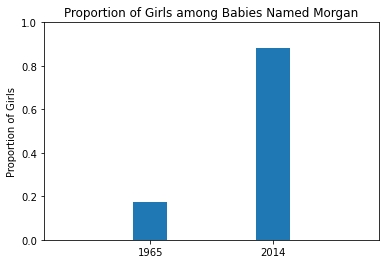

In [9]:
fig, ax = plt.subplots()
# Let's start with well known settings
ax.set_ylim([0,1])
ax.set_ylabel("Proportion of Girls")
ax.set_title("Proportion of Girls among Babies Named Morgan")
# First, we need x coordinates for the bars.
# Ultimately, the position of the bars are determined by *both* their x coordinates 
# *and* the x limits of the Axes. 
# I like to put the xlim = [0,1]. When you do, you can interpret the x coordinates 
# (a value between 0 and 1) as the proportion of the Axes on the left of the bar
# However, centering the bars in right place take a little calculation
ax.set_xlim([0,1])
# First we create a list of labels for all the bars we want
x_labels = ['1965', '2014']
n_labels = len(x_labels)
# Then we select a width for our bars (0.1 is 10% of the width of the entire Axes)
width=0.1 
# To calculate the center of the bars, we use this little loop.
# It makes sure that the space between bars and between
# bars and the left/right spines is constant
x_coor = np.zeros((n_labels,))
for i,j in enumerate(x_coor):
    x_coor[i] = (i+1)*(1-width*n_labels)/(n_labels+1) + i*width + width/2
ax.bar(x_coor, height=morgan_over_time, width=width)
ax.set_xticks(x_coor)
ax.set_xticklabels(x_labels)

The syntax of the `Axes.bar()` is quite straightforward. The only real issue is calculating the centers of the bars in such a way that the plot has harmonius horizontal spacing.

In the next plot, let's group our bars so as to compare the use of Taylor with the use of Morgan. We will group the bars by name and color them by year. 

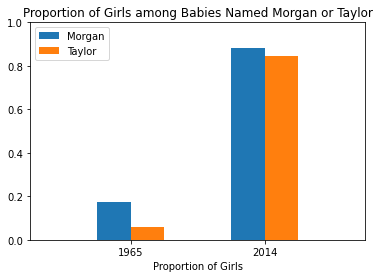

In [10]:
fig, ax = plt.subplots()
ax.set_xlim([0,1])
ax.set_xlabel("Proportion of Girls")
ax.set_title("Proportion of Girls among Babies Named Morgan or Taylor")
ax.set_ylim([0,1])
x_labels = ['1965', '2014']
n_labels = len(x_labels)
# Then we select a width for our bars (0.1 is 10% of the width of the entire Axes)
# Since we plot groups of two bars, we will set the width parameter to double its real value
# This is helpful in the calculation of the bar centers below
width= 0.1 *2
x_coor = np.zeros((n_labels,))
for i,j in enumerate(x_coor):
    x_coor[i] = (i+1)*(1-width*n_labels)/(n_labels+1) + i*width + width/2
# Real value of width
width = width/2
ax.bar(x_coor-width/2, height=morgan_over_time, width=width, label="Morgan")
ax.bar(x_coor+width/2, height=taylor_over_time, width=width, label="Taylor")
ax.set_xticks(x_coor)
ax.set_xticklabels(x_labels)
# Put a legend, as usual
ax.legend(loc='upper left')

For completness, let's check how to create a horizontal bar plot. As you can see, we need to use the method `Axes.barh()`.  The syntax for horizontal bars is identical to what we have seen for vertical bar. The only trick is that you have to invert the x with y axis -- so you have to invert the _y\_label_ with the _x\_label_ , _width_ with _height_ , etc.

<div class="alert alert-block alert-success">
    <b>More Advanced Bar Plots</b>: Bar plots have two common uses not explored here. On the one hand, they can show errorbars. The Axes.bar() and Axes.hbar() methods have a yerr and a xerr arguments very close to what we have seen for Axes.errorbar() method. On the other hand, it is common to stack columns on top of each other to show how a quantity can be decomposed. For example, we could analyze the contribution of 1965 and 2014 to the total number of people ever named "Morgan" in the US. <a href="https://matplotlib.org/3.3.0/gallery/lines_bars_and_markers/bar_stacked.html#sphx-glr-gallery-lines-bars-and-markers-bar-stacked-py">This tutorial</a> from the official documentation shows both how to add error bars to bars and how to stack bars.
    </div>

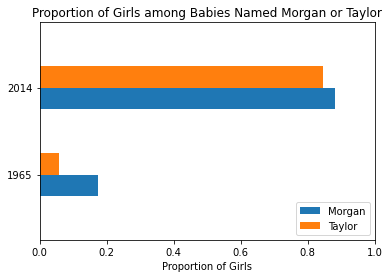

In [11]:
fig, ax = plt.subplots()
ax.set_title("Proportion of Girls among Babies Named Morgan or Taylor")
# Notice the swap of x with y w.r.t. the previous plot
ax.set_xlim([0,1])
ax.set_xlabel("Proportion of Girls")
ax.set_ylim([0,1])
ax.set_yticks(x_coor)
ax.set_yticklabels(x_labels)
# Notice the swap of width with height
ax.barh(x_coor-width/2, width=morgan_over_time, height=width, label="Morgan")
ax.barh(x_coor+width/2, width=taylor_over_time, height=width, label="Taylor")
# The legend also changes its place
ax.legend(loc='lower right')

#### Your Turn

We have plotted the Morgan and Taylor data grouped by year. Now it is your turn to plot the same data grouped by name. Notice that the x coordinates for the center of the bars are the same as before -- since, as before, we have two groups of two bars. So, we don't need to re-calculate it.

In [ ]:
# Here I just re-organize the data by year instead of by-name
# y_1965 contains the data (both Morgan and Taylor) for year 1965
y_1965 = np.array([morgan_over_time[0], taylor_over_time[0]]).flatten()
# y_2014 contains the data (both Morgan and Taylor) for year 1965
y_2014 = np.array([morgan_over_time[1], taylor_over_time[1]]).flatten()

In [ ]:
# The new x tick labels
x_labels = ['Morgan', 'Taylor']
width = 0.1
# x_coordinate are the same, so no need to do anything

# Create the figure and the axes
fig, ax = 
# set the x limit to 0-1
ax.
# Set the x ticks to x_coor
ax.
# set the x tick labels to x_labels
ax.
# Set the x label to "Proportion of Girls"
ax.
# set the y limit to 0-1
ax.
# Set the titel to "Proportion of Girls among Babies Named Morgan or Taylor"
ax.
# Create the bars for 1965 using the variable y_1965. The width should be set to width and the label to 1965
ax.bar(x_coor-width/2, )
# Create the bars for 2014 using the variable y_2014. The width should be set to width and the label to 2014
ax.
# Put a legend in the  upper left corner
ax

### Histograms

NSF is very concerned about the rise and fall of name fashion -- by the way, let me mention that this is actually a _very_ interesting sociological question. They pay us 2 milion dollars to collect a simple random sample of people named "Morgan" and "Taylor". We collected data about 10,000 Taylor and 10,000 Morgan from the Social Security database. As a first thing, we want to analyze the distribution of the birthdates of our respondents.

First we create...uhm, I meant _collect_ the data we will be plotting.

In [12]:
# To do our SRS of birthyears, I need a list containing all the population of samplable years
# To arrive there, I use a simple trick with the Counter dictionary
from collections import Counter

# Size of the sample
n = 10000
seed = 4567891
# Create a generator
rng = np.random.default_rng(seed)
# Do the sample for Morgan
# Create a counter of the form Year: Number_of_babies
y_population = Counter({y:morgan.loc[y, 'Total'] for y in morgan['Year']})
# This line creates a list containing the years as counted by the Counter
y_population = np.array( list(y_population.elements()))
# We can now sample randomly from the list
morgan_bd = rng.choice(y_population, n, replace = False)
# We represent the exact birthdate by adding a random number between 0-1 to each year
morgan_bd = morgan_bd + rng.random(n)

# Same for Taylor
y_population = Counter({y:taylor.loc[y, 'Total'] for y in taylor['Year']})
# This line creates a list containing the years as counted by the Counter
y_population = np.array( list(y_population.elements()))
# We can now sample randomly from the list
taylor_bd = rng.choice(y_population, n, replace = False)
# We represent the exact birthdate by adding a random number between 0-1 to each year
taylor_bd = taylor_bd + rng.random(n)

# Put the data in DataFrame
birthday_sample = pd.DataFrame({'Taylor': taylor_bd, 'Morgan': morgan_bd})
print(f'This is how the birthday data looks like:\n{birthday_sample.head()}')

This is how the birthday data looks like:
        Taylor       Morgan
0  2009.280796  2004.646043
1  1995.433296  1996.305397
2  2005.946848  1993.347381
3  1998.125315  2014.158038
4  1991.275987  1997.966263


We will analyze the distribution of "Morgan" and "Taylor" birthdays with histograms. I believe histograms need no presentation. They represent the data distribution over a continous variables with rectangles. Matplotlib offers a simple syntax to draw histograms based on the method `Axes.hist()`. The only other argument we (almost) always need to specify is _bins_ . This argument regulate the creation of bins for the histogram. You can pass an integer number `k`, `Axes.hist()` will create `k` equally speced bins -- by default, `Axes.hist()` will create 10 equally-spaced bins, but this is rarely what we want. Otherwise, you can pass an array showing the boundaries of each bin, as we do below using the function `histogram_bin_edges` from numpy.

Let's start with drawing the data for Taylor.

Text(0, 0.5, 'Raw number')

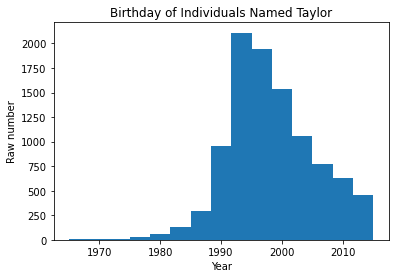

In [13]:
# The fundamental line
fig, ax = plt.subplots()
# the argument bins control the number of bins and their exact position 
# by default, matplotlib will use 10 equally-spaced bins
ax.hist(birthday_sample['Taylor'], bins = 15)
ax.set_title("Birthday of Individuals Named Taylor")
ax.set_xlabel('Year')
ax.set_ylabel('Raw number')

Often time, you want to compare distributions for different data series. Let's plot more than one histogram in the same plot.

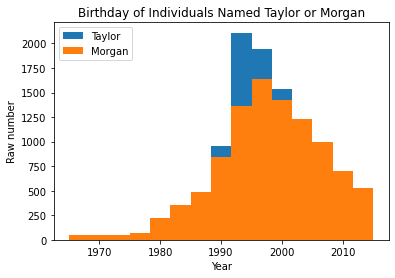

In [14]:
# Same as before
fig, ax = plt.subplots()
ax.hist(birthday_sample['Taylor'], bins = 15, label='Taylor')
ax.set_title("Birthday of Individuals Named Taylor or Morgan")
ax.set_xlabel('Year')
ax.set_ylabel('Raw number')
# Add a new histogram
ax.hist(birthday_sample['Morgan'], bins = 15, label='Morgan')
ax.legend(loc='upper left')
# Looks terrible!

The main issue with the previous plot is that the two histograms overlap and the one on the forefront covers the one on the background. Another issue is that the binning seems slightly different in the two histograms.

We will solve the first issue by not filling the histograms. We will use the _histtype_ argument of `Axes.hist()` to do this. Another solution is to use semi-transparent histograms, as shown in the exercise below. 

As for the second issue, we will use the _bins_ argument to specify the binning we want. However, we first need to engeneer a uniform binning for both data series. In this case, we are quite lucky that the two data series are defined over the same support. So, we could use the binning that matplotlib produces based on the first data series we input for both series. This is what I would usually do in a case like this. However, I will show you a method that works for not-so-well-aligned data as well. It is a little more complex, but more general -- so you can apply it to your data. The method is based on the function `histogram_bin_edges()` from numpy -- internally used by matplotlib `Axes.hist()` to create its own binning.

<div class="alert alert-block alert-success">
    <b>Binning</b>: The choice of the right binning is fundamental to construct a good histogram. Indeed, you can see the histogram as an estimator. Too many bins means that you put too much confidence in your data. Too few bins means that you are not using your data optimally. And your confidence should change depending on the region of the space -- some region will be more populated than others in your data. <a href="https://docs.astropy.org/en/stable/visualization/histogram.html">This tutorial</a> from AstroPy shows how different binning strategies can tell completely different stories based on the same data. Researchers have investigated binning strategy for decades. The function histogram_bin_edges() implements some of the most popular binning strategies available from literature. These strategy are completely automatic (you do not need to specify the number of bins) and provide a strong theoretical justification for your bins. See <a href="https://docs.astropy.org/en/stable/visualization/histogram.html">the official numpy documentation</a> for an overview of what is available.
        </div>

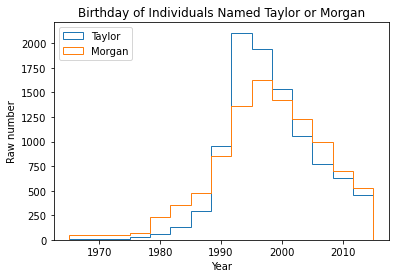

In [15]:
# To get a uniform binning for both dataseries we first create a numpy array with both series
all_data = np.concatenate((birthday_sample['Taylor'], birthday_sample['Morgan']))
# This is the command that will get you binning for the entire dataset.
# It is the same function that matplotlib uses behind the scene
bins = np.histogram_bin_edges(all_data, bins=15, range=[1965, 2015])
# Same as before
fig, ax = plt.subplots()
ax.set_title("Birthday of Individuals Named Taylor or Morgan")
ax.set_xlabel('Year')
ax.set_ylabel('Raw number')
# Add the histograms. Notice the histtype argument
ax.hist(birthday_sample['Taylor'], bins = bins, label='Taylor', histtype='step')
ax.hist(birthday_sample['Morgan'], bins = bins, label='Morgan', histtype='step')
ax.legend(loc='upper left')
# Better!

#### Your Turn

Another, possibly more popular, way to plot multiple histograms on the same `Axes` is to make them semi-transparent using the alpha values. Here we will be using the style _bmh_ -- an acronym for the book <a href="http://camdavidsonpilon.github.io/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/">Bayesian Methods for Hacker</a>. This style is engeneered to compare histograms. We will also modify the alpha of the two hitograms. We will be using the bins we calculated above, so no reason to re-calculate them.

In [ ]:
# Change the style to bmh

# Create the fig and ax
fig, ax =
# Set the title to "Birthday of Individuals Named Taylor or Morgan"
ax.
# Set the x label to "Year"
ax.
# Set the y label to "Raw Number"
ax.
# Create first histogram with the Taylor data
# Remember to specify the bins and the label
# Also, set the alpha argument to 0.3
ax.
# Create the histogram with the Morgan data. Remember bins and label
# Here as well, set the alpha argument to 0.3
ax.
# Create legedn in upper left corner
ax.
# Back to default style
plt.style.use('default')

### Heatmaps and Images

As the final chapter of the workshop, let's examine heatmap and raster images. Wikipedia defines the heatmap as "a data visualization technique that shows magnitude of a phenomenon as color in two dimension". Practically, a heatmap is a plot of a matrix. Raster images are the most common kind of digitized pictures. Png, Jpegs, tiff, etc. are all raster images. You can use matplotlib to visualize them. Now, this is not very common practice. For example, matplotlib does not save in jpeg. If you really need to do work with raster images, probably you will end up using the library <a href="https://pypi.org/project/Pillow/">pillow</a>, which matplotlib uses behind the scene anyway. However, as you will see, creating a heatmap and visualizing a raster image is substantially the same. Therefore, it is worth knowing how to do it.

#### Heatmaps


Heatmaps are colorful representation of matrices. Therefore, we will start by constructing a matrix to be drawn. We will plot the proportion of girls named Morgan and Taylor for every 10 years in the dataset.

In [16]:
# Take the data from the morgan DataFrame and transform it in a matrix
selected_yrs = np.arange(1965, 2014, 8)
matrix_dt = np.array([morgan.loc[selected_yrs, 'Proportion'], taylor.loc[selected_yrs, 'Proportion']])
matrix_dt = matrix_dt.T
# print(selected_yrs)
print(f"The selected years:{selected_yrs}\n\n")
print(f"First five rows of the data matrix:\n{matrix_dt[:5,:]}")

The selected years:[1965 1973 1981 1989 1997 2005 2013]


First five rows of the data matrix:
[[0.17460317 0.05882353]
 [0.26224784 0.16363636]
 [0.69794953 0.33218589]
 [0.84275652 0.45584939]
 [0.90686661 0.81825047]]


Now we will use the method `Axes.imshow()` to produce a heatmap of the data. In a heatmap, it is fundamental to choose the right colormap to make the plot readable. Since a proportion goes from 0 to 1, it is appropriate to use a "perceptually uniform" cmap. When negative and positive numbers are in the data, one may opt for a "divergent" cmap. Here, we will be using "plasma" as our cmap.

[Text(0, 0, 'Morgan'), Text(0, 0, 'Taylor')]

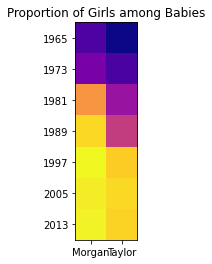

In [17]:
# Create the figure and the axis
fig, ax =plt.subplots()
# visualize the matrix
ax.imshow(matrix_dt, cmap='plasma')
# Title
ax.set_title('Proportion of Girls among Babies')
# Set the y ticks so that row has a tick
ax.set_yticks(range(selected_yrs.shape[0]))
# Set the y ticks label to display the year
ax.set_yticklabels(selected_yrs)
# Set the x ticks so that column has a tick
ax.set_xticks(range(2))
# Set the x ticks label to display the name
ax.set_xticklabels(['Morgan', 'Taylor'])

What is lacking from the plot above is a color scale telling us what the colors mean. Above, I showed how to use `Figure.colorbar()` to create such a scale. The same code applies here. However, we can also write the value of each cell directly inside the cell in the plot. To do that, we will use the method `Axes.text()`, which lets us write on the `Axes`.

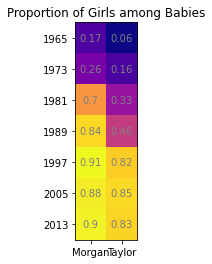

In [18]:
# Same plot as above
fig, ax =plt.subplots()
ax.imshow(matrix_dt, cmap='plasma')
ax.set_title('Proportion of Girls among Babies')
ax.set_yticks(range(selected_yrs.shape[0]))
ax.set_yticklabels(selected_yrs)
ax.set_xticks(range(2))
ax.set_xticklabels(['Morgan', 'Taylor'])

# Loop over rows and columns to write text in each cell
for i in range(matrix_dt.shape[0]):
    for j in range(matrix_dt.shape[1]):
        # We use np.round_ to show only two digits
        text = ax.text(j, i, np.round_(matrix_dt[i, j],2),
                       horizontalalignment="center", verticalalignment="center", 
                       color="gray")

#### Raster Images

It turns out that raster images are like big matrices. For example, a 600x400 raster image in grayscale is a 600x400 matrix. Each cell in the matrix contains the information to color the corresponding pixel in the image. Color images works in the same way. The only difference between color and grayscale images is that color images have 4 matrices stacked on top of each others: a matrix for the red channel, a matrix for the green channel, a matrix for the blue channel, and a matrix for the alpha channel. These four matrices together specify the RGBA coordinate of each pixel. Therefore, drawing a heatmap is really similar to drawing a picture. Usually, raster images are much bigger than data matrices, but the principle and syntax to draw them is the same.  

Here, we will load a Taylor-related image from the internet and visualize it.

This is the matrix of the red channel:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


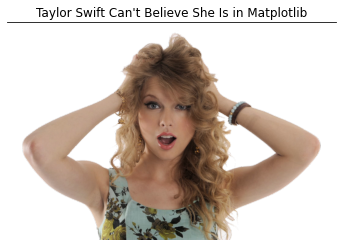

In [19]:
# This is the syntax to load a png image as a series of stacked matrices inside python
import matplotlib.image as mpimg

url_image = r"https://raw.githubusercontent.com/non87/Matplotlib-Workshop/master/data/taylor_swift.png"
img = mpimg.imread(url_image)
# See the red channel in the image:
print(f"This is the matrix of the red channel:\n{img[:,:,0]}")

# Now the plot. There is really nothing new here.
fig, ax = plt.subplots() 
ax.imshow(img)
ax.set_title("Taylor Swift Can't Believe She Is in Matplotlib")
# We eliminate the usual paraphernalia of data plotting, such as axis ticks.
ax.set_xticks([])
ax.set_yticks([])
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
fig.savefig("taylor.png", dpi=200)

#### The End

This is the end of the workshop. Thanks for attending. As a bonus, we will have a little fun with Taylor. This plot wraps up nicely what we have done -- and shows that in order to something slightly different than usual, you always need what you learned in the first part of the workshop. We will create a Warhol-like plot of Taylor Swift.

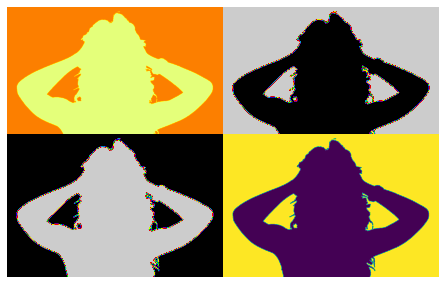

In [20]:
fig, ax = plt.subplots(nrows=2, ncols=2) 
# Delete the space between axes and occupy the entirity of the fig with axes
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=-0.21, wspace=0)
# Eliminate axis, spines, etc.
for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        ax[i,j].spines['top'].set_visible(False)
        ax[i,j].spines['bottom'].set_visible(False)
        ax[i,j].spines['left'].set_visible(False)
        ax[i,j].spines['right'].set_visible(False)

# Select background pixels as those that are transparent
background_pixels = (img[:,:,3] == 0)
background_matrix = np.zeros_like(img[:,:,0])
background_matrix[background_pixels] = 1
# ax[0,0].imshow(img[:,:,0], cmap='hot')
ax[0,0].imshow(background_matrix, cmap='Wistia')
ax[0,1].imshow(background_matrix, cmap='nipy_spectral')
ax[1,0].imshow(background_matrix, cmap='nipy_spectral_r')
ax[1,1].imshow(background_matrix, cmap='viridis')
# Save this masterpiece. Notice the transparency
fig.savefig('taylor_warhol.png', dpi=200, transparent=True)